# Time Entry for CSE Utilization

### Please create a utilization folder and place this file in there.
#### If this is your first time running this app. Please head to the bottom of the app and start with cell 18.

### Use the code snippets below to insert the recorded time in the Database.

In [1]:
%run -i util.py -d "2018-08-09" -t 30 -de "Admin Time - Brewing Built"

[(1, '2018-08-06', 30, 'Admin Time - PP'), (2, '2018-08-06', 30, 'Admin Time - Research'), (3, '2018-08-06', 15, 'Admin Time - PP'), (4, '2018-08-07', 15, 'Admin Time - Coffee'), (5, '2018-08-07', 30, 'Admin Time'), (6, '2018-08-07', 30, 'Admin Time - PP'), (7, '2018-08-07', 30, 'Admin Time - Q2 Briefing'), (8, '2018-08-07', 15, 'Admin Time - Promote 1 on 1'), (9, '2018-08-07', 30, 'Team Time - All Hands Follow up meeting'), (10, '2018-08-07', 120, 'Queue Manager'), (11, '2018-08-08', 15, 'Admin Time - PP'), (12, '2018-08-08', 15, 'Admin Time - Coffee'), (13, '2018-08-08', 15, 'Admin Time - 1 on 1 w/ Cara'), (14, '2018-08-08', 60, 'Admin Time - Time w/ Hoss'), (15, '2018-08-08', 30, 'Admin Time - Promote 1 on 1'), (16, '2018-08-08', 60, 'Admin Time - Research'), (17, '2018-08-09', 15, 'Admin Time - Coffee'), (18, '2018-08-09', 45, 'Admin Time - Pulse Surveys'), (19, '2018-08-09', 30, 'Admin Time - PP'), (20, '2018-08-09', 30, 'Admin Time - Brewing Built')]


### Summarize the data in the database for Viewing purposes

In [2]:
%run -i util.py -s "sum"

### View DataFrame

In [3]:
filterVal = 0

In [4]:
import pandas as pd
import arrow

if filterVal:
    
    df = pd.read_csv("files/metrics.csv")
    date_today = arrow.now().format('YYYY-MM-DD')
    df = df[df["Dates"] == date_today]
    print(df)

else:
    df = pd.read_csv("files/metrics.csv")
    print(df)

    

    id       Dates  total_time                        label_description
0    1  2018-08-06          30                          Admin Time - PP
1    2  2018-08-06          30                    Admin Time - Research
2    3  2018-08-06          15                          Admin Time - PP
3    4  2018-08-07          15                      Admin Time - Coffee
4    5  2018-08-07          30                               Admin Time
5    6  2018-08-07          30                          Admin Time - PP
6    7  2018-08-07          30                 Admin Time - Q2 Briefing
7    8  2018-08-07          15              Admin Time - Promote 1 on 1
8    9  2018-08-07          30  Team Time - All Hands Follow up meeting
9   10  2018-08-07         120                            Queue Manager
10  11  2018-08-08          15                          Admin Time - PP
11  12  2018-08-08          15                      Admin Time - Coffee
12  13  2018-08-08          15              Admin Time - 1 on 1 

### Group the data in the Dataframe

In [5]:
groupedval = 0

In [6]:
if groupedval:
    ## Represents grouping by Dates
    groupdf =df.groupby(['Dates','label_description'])['total_time'].sum()
else:
    ## represents grouping by Label Description
    groupdf =df.groupby(['label_description'])['total_time'].sum()

### Graphical View of Data

<Figure size 432x288 with 0 Axes>

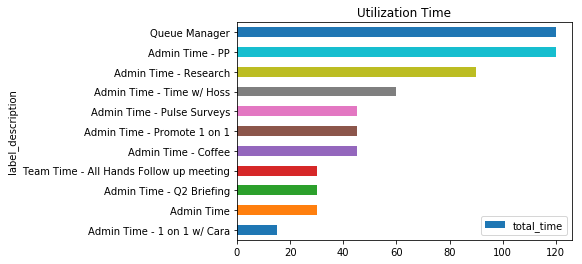

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

cleandf = groupdf.reset_index()
clean_df = cleandf[["label_description", "total_time"]].sort_values(by=['total_time'], ascending=True)

plt.figure(); clean_df.plot.barh(x='label_description', y='total_time', title="Utilization Time");

### Total Hours worked

In [9]:
df['total_time'].sum() / 60

6.25

### Backup the Database

In [9]:
%run -i util.py -s "sum" -b "bk"


Creating E:/utilization/backups/backup_db\utilization-2018-08-06...

------------------------------

Creating E:/utilization/TaskManager/files\Final_Metrics_2018-08-06.csv



### Remove a row from the Database

In [4]:
%run -i util.py -r 17

### Clear the database and Save the data to a backup database

In [10]:
%run -i util.py -dr "Drop" -c "Create"

[(1, None, None, None)]


# Steps for creating the necessary files and directories to run this App

In [18]:
## Edit the E drive path with the drive path you create 
## the utlization folder in.  
import sys
sys.path.append("E:/utilization/TaskManager")

### Create folders and directories for this App (Need to be in the utilization folder directory for these commands to work)

In [17]:
!mkdir ..\TaskManager
!mkdir ..\TaskManager\files
!mkdir ..\backups
!mkdir ..\backups\backup_db
!mkdir ..\backups\backup_files
!mkdir ..\TaskManager\logger

### Create the requirements.txt file

In [50]:
%%file requirments.txt
appJar==0.93.0
arrow==0.12.1
DateTime==4.2
numpy==1.14.5
pandas==0.23.1
python-dateutil==2.7.3
pytz==2018.4
six==1.11.0
zope.interface==4.5.0
ipykernel

Writing requirments.txt


### Create the venv for python and afterwards use the CLI to activate and install the necessary files for this app to work

In [45]:
%sx python -m venv projectname
## Run the commands lines below in the location path above this current directory
## source projectname/bin/activate
## (projectname) $ pip install -r requirementst.txt 
## (projectname) $ pip install ipykernel
## (projectname) $ ipython kernel install --user --name=projectname

[]

'e:/utilization/production/utilization'